# Teoria do Caos

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from numba import jit

sns.set_theme()
sns.set_palette("colorblind")

## Algoritmos

### Primeiras Tarefas

Primeiramente, temos que ter uma função que consiga nos dar o passo seguinte dado o passo atual.

In [2]:
@jit(nopython=True)
def evolve(x_n,r):
    """
    Faz um passo da evolução da população segundo o modelo do enunciado.
    No caso, a fórmula a ser usada é: x_{n+1} = r * x_n * (1 - x_n)
    
    Parâmetros:
        x_n: população da n-ésima geração
        r: fator que controle o processo
        
    Retorno:
        x_n1: população da geração seguinte
    """
    x_n1 = r * x_n * (1 - x_n)
    return x_n1

Para simular fazer 50 gerações, temos uma função que itera usando a função *evolve* e retorna a evolução desses valores ao longo da execução.

In [3]:
@jit(nopython=True)
def simulateN(N, x0, r):
    """
    Faz N gerações usando a função evolve, a partir dos parâmetros dados.
    
    Parâmetros:
        N: última geração
        x0: população inicial
        r: fator usado no modelo de evolução
    Retorno:
        xs: sequência de x_n's
    
    """
    xs = []
    xs.append(x0)
    x_n = x0
    for i in range(N):
        x_n1 = evolve(x_n, r)
        xs.append(x_n1)
        x_n = x_n1
    return xs

Para as primeiras tarefas, vamos analisar o comportamento após 50 gerações, para parâmetros fornecidos. Portanto, precisamos de funções para traçar os gráficos desses resultados.

In [9]:
def plotN(N, x0, r, axis=None):
    """
    Plota as N gerações com os parâmetros passados no eixo passado.
    
    Parâmetros:
        N: última geração
        x0: população inicial
        r: fator usado no modelo de evolução
        axis: eixo a ser plotados os dados
    Retorno:
        None
    """
    if (axis is None):
        axis = plt.gca()
    axis.plot(simulateN(N, x0, r))
    axis.set_title(f"N={N}, x0={x0}, r={r}")

Além disso, é interessante ter uma função que trace quatro desses gráficos numa matriz 2x2 a partir de um mesmo valor inicial. Isso facilita as análises.

In [5]:
def plotN_x0(N, x0, r0, r1, r2, r3, fig=None, ax=None):
    """
    Plota os gráficos de N gerações para esses quatro valores de r e um mesmo x0
    num grid 2x2
    
    Parâmetros:
        N: última geração
        x0: população inicial a ser usada em todos os gráficos
        r0: fator do gráfico 0,0
        r1: fator do gráfico 0,1
        r2: fator do gráfico 1,0
        r3: fator do gráfico 1,1
    Retorno:
        None
    
    """
    if (fig is None):
        fig, ax = plt.subplots(2,2, figsize=(12,5))
        fig.tight_layout()

    iterrows = [(ax[0,0], (N, x0, r0)),
                (ax[0,1], (N, x0, r1)),
                (ax[1,0], (N, x0, r2)),
                (ax[1,1], (N, x0, r3)),
               ]

    for axis, (N, x0, r) in iterrows:
        plotN(N, x0, r, axis=axis)

### Diagrama de Bifurcação

Semelhante à função *simulate* do contexto anterior, agora vamos simular da mesma forma, mas retornaremos apenas os últimos 100 valores, isto é, das últimas 100 gerações.

In [6]:
@jit(nopython=True)
def simulateN_last100(N, x0, r):
    """
    Faz N gerações usando a função evolve, a partir dos parâmetros dados,
    mas retorna apenas os últimos 100 valores, ou seja, apenas das últimas
    100 gerações.
    
    Parâmetros:
        N: última geração
        x0: população inicial
        r: fator usado no modelo de evolução
    Retorno:
        xs: sequência dos últimos 100 x_n's
    """
    xs = simulateN(N, x0, r)
    return xs[-100:]

Com esses valors das últimas gerações apenas, podemos traçar o diagrama de bifurcação.

In [22]:
def bifurcation_plot(x0, lb, ub, n):
    """
    Traça o diagrama de bifurcação para um espaço de 'n' fatores r 
    de 'lb' até 'ub', espaçados igualmente (np.linspace).
    
    Parâmetros:
        x0: população inicial para cada iteração
        lb: limite inferior (inclusivo) dos valores de r
        ub: limite superior (inclusivo) dos valores de r
        n: tamanho do vetor
    Retorno:
        plot: figura do matplotlib com o diagrama de bifurcação
    """
    rs = np.linspace(lb, ub, n)

    Xs = []
    Ys = []
    for r in rs:
        last100 = simulateN_last100(1000, x0, r)
        Xs.append(r)
        Ys.append(last100)
    plot = plt.plot(Xs, Ys, color='b')
    return plot

## Simulações

### Tarefa 1

Faça gráficos de $ x_n $ como função de $ n $  para os seguintes valores de 𝑟: 0,5; 2,5; 3,1; 3,5 e 3,7.
Use $ x_0  = 0,5 $ e $ n $ entre 1 e 50. Comente sobre cada resultado. Em particular comente sobre
a existência de padrões.

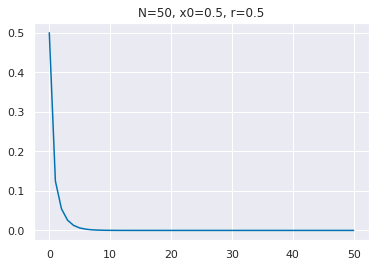

In [10]:
plotN(50, 0.5, 0.5)

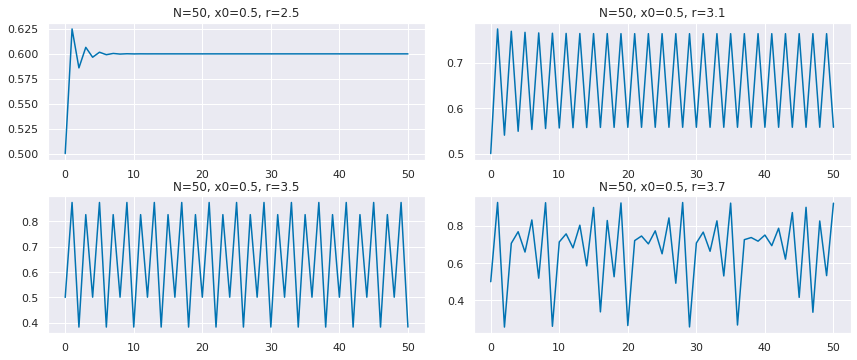

In [11]:
plotN_x0(50, 0.5, 2.5, 3.1, 3.5, 3.7)

Comentários:
* A partir de 3 tem periodicidade
* Menor que 1 claramente desce a população
* Estabilizam em 0.6 com r=2.5

(Das outras tarefas tbm)
* Vai ficando estranho até antes de 4, de 4 estabiliza
* De 4.1 em diante não funciona mais

### Tarefa 2

Refaça os gráficos anteriores considerando três condições iniciais consideravelmente
diferentes, ou seja, trace as curvas para $ x_0 = 0.25 $, $ x_0 = 0.5 $ e $ x_0 = 0.75 $. Comente.

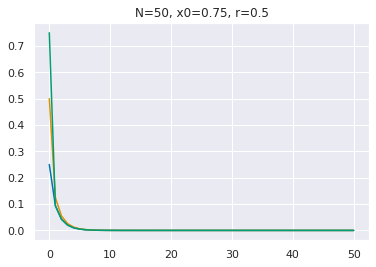

In [13]:
for x0 in [.25, .5, .75]:
    plotN(50, x0, 0.5)

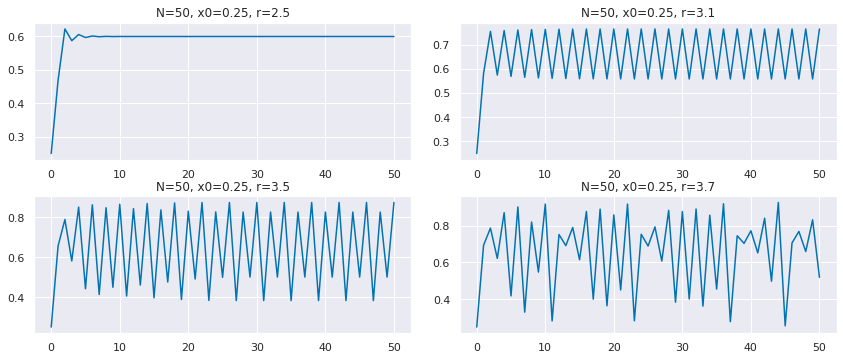

In [14]:
plotN_x0(50, 0.25, 2.5, 3.1, 3.5, 3.7)

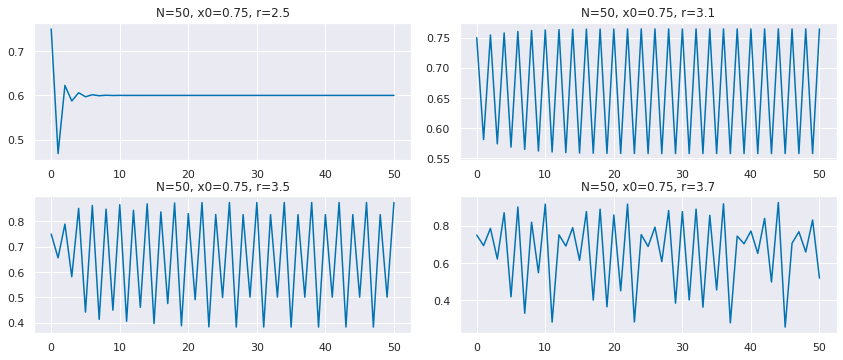

In [15]:
plotN_x0(50, 0.75, 2.5, 3.1, 3.5, 3.7)

**Comentários**:
- A frequência (da ondulação) parece aumentar com o aumento do r
- Todos estabilizam no 0.6
- As oscilações parecem ficar em torno do 0.6, para r>1
- Para r<1, o comportamento é muito semelhante

### Tarefa 3

Refaça os gráficos anteriores considerando três condições iniciais ligeiramente diferentes, ou
seja, trace as curvas para $ x_0 = 0.5 $, $ x_0 = 0.501 $ e $ x_0 = 0.5001 $. Comente.

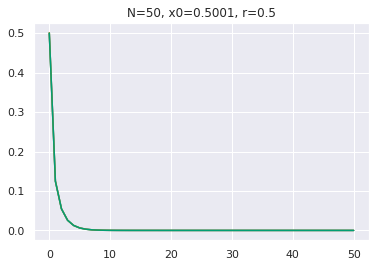

In [16]:
for x0 in [.5, .501, .5001]:
    plotN(50, x0, 0.5)

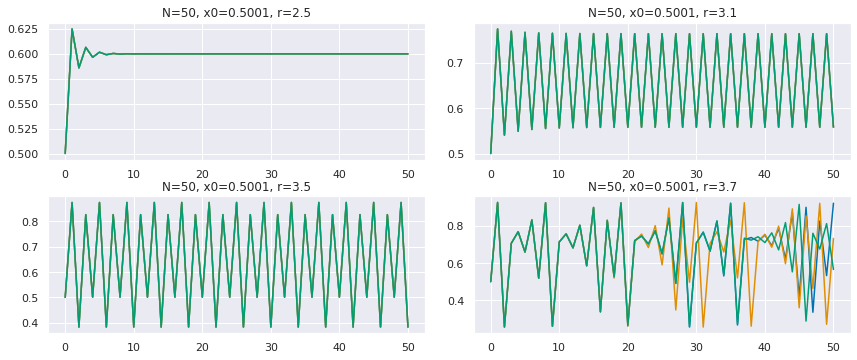

In [17]:
fig, ax = plt.subplots(2,2, figsize=(12,5))
fig.tight_layout()
plotN_x0(50, 0.5, 2.5, 3.1, 3.5, 3.7, fig=fig, ax=ax)
plotN_x0(50, 0.501, 2.5, 3.1, 3.5, 3.7, fig=fig, ax=ax)
plotN_x0(50, 0.5001, 2.5, 3.1, 3.5, 3.7, fig=fig, ax=ax)

**Comentários**
- Diferença só no 3.7, começa a se perder
- Em todas as anteriores elas são idênticas, até porque são números muito próximos

### Tarefas 4, 5 e 6

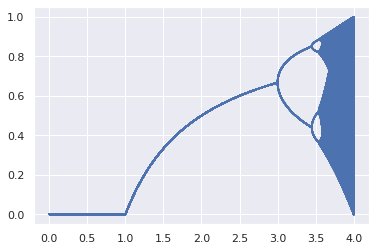

In [25]:
bifurcation_plot(0.5, 10**-5, 4, 30*10**3);

(0.44, 0.56)

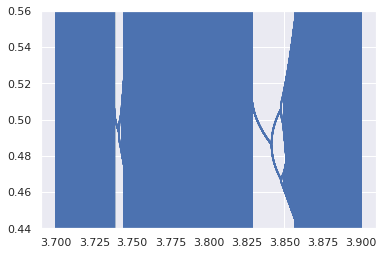

In [23]:
bifurcation_plot(0.5, 3.7, 3.9, 30*10**3);
plt.ylim(0.44, 0.56)

(0.44, 0.56)

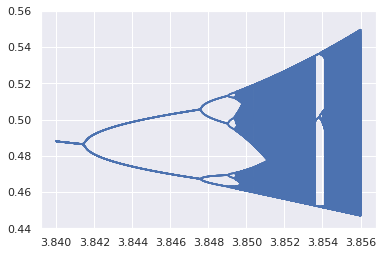

In [24]:
bifurcation_plot(0.5, 3.840, 3.856, 30*10**3);
plt.ylim(0.44, 0.56)

**Comentário**  
- O que o diagrama representa, o que é uma linha vertical, caos no final
- Ela se ramifica, quase que recursivamente quando aproximamos

https://devser.com.br/posts/diagrama-de-bifurcacao-do-mapa-logistico/

# OFF

In [84]:
def simulate30k(x0, lb, ub, n):
    """
    Faz 1000 gerações usando a função evolve, a partir do valor inicial dado,
    para um espaço de 'n' fatores r de 'lb' até 'ub', espaçados igualmente (np.linspace)
    
    Parâmetros:
        x0: população inicial para cada iteração
        lb: limite inferior (inclusivo) dos valores de r
        ub: limite superior (inclusivo) dos valores de r
        n: tamanho do vetor
    Retorno:
        None
    """
    rs = np.linspace(lb, ub, n)
    for r in rs:
        last100 = simulate1k(1000, x0, r)
        plt.plot(last100)

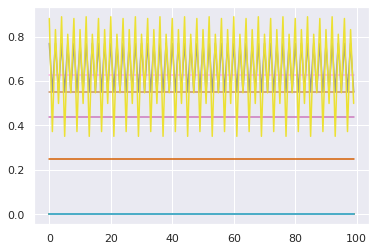

In [86]:
simulate30k(0.5, 10**-5, 4, 10)

In [ ]:
plot50_x0(50, 0.25, 2.5, 3.1, 3.5, 3.7)

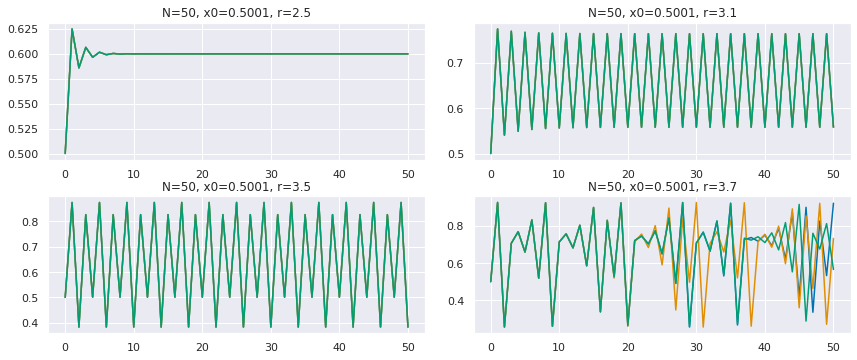

In [55]:
x0 = .5
plot50_x0(50, .5, 2.5, 3.1, 3.5, 3.7)

# De 2.5 a 3.7
fig, ax = plt.subplots(2,2, figsize=(12,5))
fig.tight_layout()

iterrows = [(ax[0,0], (50, x0, 2.5)),
            (ax[0,1], (50, x0, 3.1)),
            (ax[1,0], (50, x0, 3.5)),
            (ax[1,1], (50, x0, 3.7)),
           ]

for axis, (N, x0, r) in iterrows:
    plot50(N, x0, r, axis=axis)
    
    
x0 = .501
iterrows = [(ax[0,0], (50, x0, 2.5)),
            (ax[0,1], (50, x0, 3.1)),
            (ax[1,0], (50, x0, 3.5)),
            (ax[1,1], (50, x0, 3.7)),
           ]

for axis, (N, x0, r) in iterrows:
    plot50(N, x0, r, axis=axis)

x0 = .5001
iterrows = [(ax[0,0], (50, x0, 2.5)),
            (ax[0,1], (50, x0, 3.1)),
            (ax[1,0], (50, x0, 3.5)),
            (ax[1,1], (50, x0, 3.7)),
           ]

for axis, (N, x0, r) in iterrows:
    plot50(N, x0, r, axis=axis)

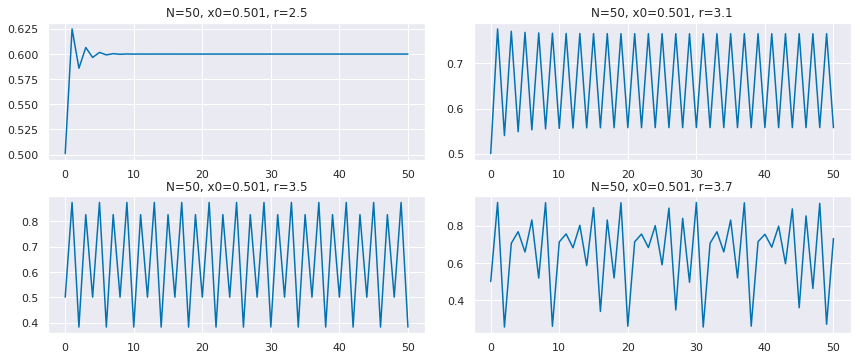

In [52]:
x0 = .501

# De 2.5 a 3.7
fig, ax = plt.subplots(2,2, figsize=(12,5))
fig.tight_layout()

iterrows = [(ax[0,0], (50, x0, 2.5)),
            (ax[0,1], (50, x0, 3.1)),
            (ax[1,0], (50, x0, 3.5)),
            (ax[1,1], (50, x0, 3.7)),
           ]

for axis, (N, x0, r) in iterrows:
    plot50(N, x0, r, axis=axis)

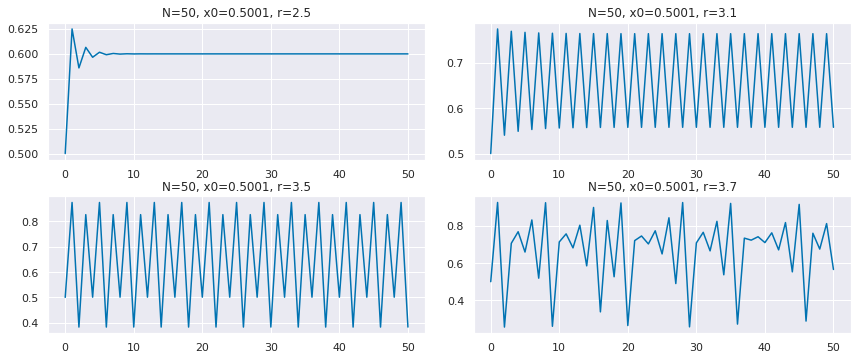

In [53]:
x0 = .5001

# De 2.5 a 3.7
fig, ax = plt.subplots(2,2, figsize=(12,5))
fig.tight_layout()

iterrows = [(ax[0,0], (50, x0, 2.5)),
            (ax[0,1], (50, x0, 3.1)),
            (ax[1,0], (50, x0, 3.5)),
            (ax[1,1], (50, x0, 3.7)),
           ]

for axis, (N, x0, r) in iterrows:
    plot50(N, x0, r, axis=axis)

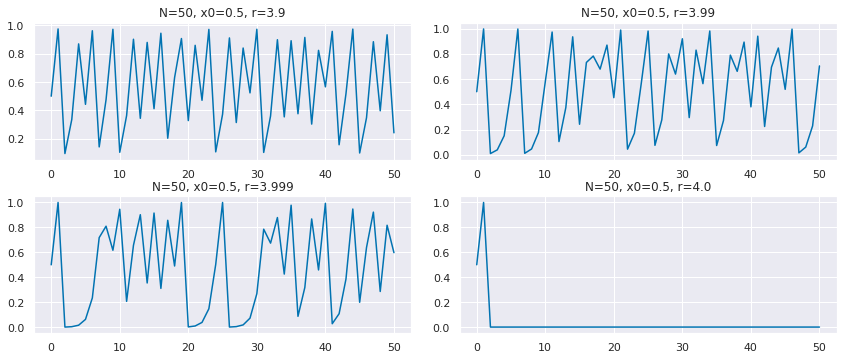

In [42]:
fig, ax = plt.subplots(2,2, figsize=(12,5))
fig.tight_layout()


iterrows = [(ax[0,0], (50, 0.5, 3.9)),
            (ax[0,1], (50, 0.5, 3.99)),
            (ax[1,0], (50, 0.5, 3.999)),
            (ax[1,1], (50, 0.5, 4.0)),
           ]

for axis, (N, x0, r) in iterrows:
    plot50(N, x0, r, axis=axis)

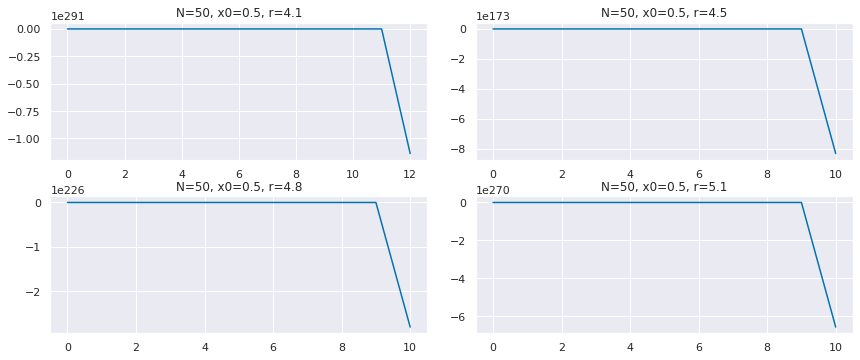

In [43]:
fig, ax = plt.subplots(2,2, figsize=(12,5))
fig.tight_layout()


iterrows = [(ax[0,0], (50, 0.5, 4.1)),
            (ax[0,1], (50, 0.5, 4.5)),
            (ax[1,0], (50, 0.5, 4.8)),
            (ax[1,1], (50, 0.5, 5.1)),
           ]

for axis, (N, x0, r) in iterrows:
    plot50(N, x0, r, axis=axis)